In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import *

# How would the United States population be effected if Ellis Island had never opened?

In [2]:
### Only initial difference is that Fake has NO immigration
UnitedStatesReal = System(population = 65500000, birthRates = .0294, deathRates = .0233) #U.S. Population with Ellis Island Open
UnitedStatesFake = System(population = 65500000, birthRates = .0294, deathRates = .0233) #U.S. Population if Ellis Island Didn't Exist

alpha = .0259            #birth rate 1950-1924
beta = .0192            #birth rate 1975-1950
gamma = .0145            #birth rate 2000-1975
delta = .0133            #birth rate 2018-2000

epsilon = 0.0174       #death rate 1950-1924
zeta = 0.00915          #death rate 1975-1950
eta = .00865           #death rate 2000-1975
theta = .00845           #death rate 2018-2000

resultsWith = TimeSeries() #Yearly Population with Immigration
resultsWithOut = TimeSeries() #Yearly Population without Immigration

data = pd.read_csv('PopProj.csv',header = 0, index_col=0, dtype = {'Year':int, 'Num.Aliens':int})
yearRange = linrange(1892,2019) #the year Ellis Island closed to now
UnitedStatesFake

,values
population,6.550000e+07
birthRates,2.940000e-02
deathRates,2.330000e-02


While creating this model there are several decisions we made:
- The Timeline
    - We decided that our model should cover the amount of time that Ellis Island was open up to the present. That way we could properly observe the effect that the lack of Ellis Island's existance would have on us today.
- The Demographics
    - Originally, we planned on separating our data and excluding only certain demographics from passage through Ellis Island. However, we quickly realized that it would be very difficult and unneccesary to search for data involving each specific demographic, so we just looked at the extremes - if Ellis Island existed and if it didn't
- What to assume
    - Birth and Death Rates are a major assumption that we made. We decided to assume that birth rates and death rates stayed constant over approximately 25 year periods. We made this assumption because we felt it was excessive to import the data for each year.
    - Immigration was also not included in the model for years after 1924, which is the year Ellis Island closed. This is because we determined that excluding the immigration numbers would not change the overall difference in populations, due to the immigration numbers being the same for both population. Also, the data is difficult to find. 
    

In [3]:
#Model increase over the span of ELlis Island
def update_func1(system, immigration, x): #inputs are the System changing and whether or not immigration is occuring
    popDecrease = system.population*system.deathRates #The yearly net decrease in population
    if(immigration):
        popIncrease = (system.population*system.birthRates) + data.values[x] #The yearly net increase in population with immigration
    else:
        popIncrease = system.population*system.birthRates #The yearly net increase in population without immigration
    system.population = popIncrease+system.population-popDecrease #New Population after incorporating New Growth
#Model increase after Ellis Island Closed (no change in immigration)
def update_func2(system, x): #birth rates and death rates based on year range
    if(x <= 1950 and x > 1924 ): 
        system.birthRates = alpha
        system.deathRates = epsilon
    elif(x <= 1975 and x > 1950 ):
        system.birthRates = beta
        system.deathRates = zeta
    elif(x <= 2000 and x > 1975 ):
        system.birthRates = gamma
        system.deathRates = eta
    elif(x <= 2018 and x > 2000 ):
        system.birthRates = delta
        system.deathRates = theta
    popDecrease = system.population*system.deathRates #The yearly net decrease in population
    popIncrease = system.population*system.birthRates #The yearly net increase in population with immigration
    system.population = popIncrease+system.population-popDecrease #New Population after incorporating New Growth

In [4]:
def run_simulation(yearRange, system1, system2): #Updates and stores annual population
    for x in range(len(yearRange)):
        if(x <= 32): #Updates the Systems for each year Ellis Island was open
            update_func1(system1, True, x) 
            resultsWith[x] = system1.population
            update_func1(system2, False, x)
            resultsWithOut[x] = system2.population
        else: #Updates the Systems for each year Ellis Island was closed
            update_func2(system1, x)
            resultsWith[x] = system1.population
            update_func2(system2, x)
            resultsWithOut[x] = system2.population

In [5]:
def plot_results(resultsWith, resultsWithOut, title): # plots the results of both models
    plot(yearRange, resultsWith, 'b', label='U.S. Population With Ellis Island') # plots given Ellis Island Existed
    plot(yearRange, resultsWithOut, 'r', label='U.S. Population If Ellis Island Never Existed') # plots given Ellis Island didn't exist
    
    decorate(xlabel='Year', 
             ylabel='World population (billions)',
             title=title)

In [6]:
run_simulation(yearRange, UnitedStatesReal, UnitedStatesFake)

In [7]:
UnitedStatesReal

,values
population,1.697405e+08
birthRates,2.940000e-02
deathRates,2.330000e-02


In [8]:
UnitedStatesFake

,values
population,1.417971e+08
birthRates,2.940000e-02
deathRates,2.330000e-02


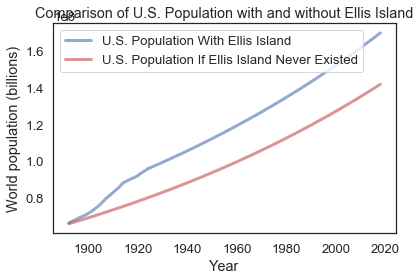

In [9]:
plot_results(resultsWith, resultsWithOut, 'Comparison of U.S. Population with and without Ellis Island')

Our model shows that if Ellis Island never existed, the U.S. population would be fairly less than what it is today. This would affect the U.S. in a myriad of different ways, from systemic changes, such as taxes, to social changes, such as U.S. culture and diversity. 

We see this in our model's output, because the output shows the difference in growth that occurs which is shown to lead to a difference in total population. And from this difference in population, one can assume certain changes that would occur to the United States, based on studies done on population size and how it affets a nation.